In [965]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VARMAX 
from scipy.stats import pearsonr
import WranglerFunctions as wf
import math

# VARMA Model

<b>Referes to</b> 
<ul>
    <li><a>https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ </a></li>
    <li><a>https://youtu.be/7_Js8h709Dw</a></li>
    <li><a>https://youtu.be/6Ye0CsfRDJg</a></li>
    <li><a>https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_varmax.html#Caution:-VARMA(p,q)-specifications</a></li>
    

Stands for Vector Autoregressive Intergrated Moving average <br>

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
<ul>
    <li><b>V:</b> Vector. Allows for multiple variables to be taken into account.
    </li>
    <li><b>AR:</b> Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
    </li><li><b>MA: </b>Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
    </li></ul>
    
<br> Standard notation is used of VARMA(p,d,q)

The parameters of the VARMA model are defined as follows:
<ul>
<li><b>p:</b> The number of lag observations included in the model, also called the lag order.
</li><li><b>q:</b> The size of the moving average window, also called the order of moving average. </li></ul>

## Cleanin Time Series Data

In [966]:
#Getting combine dataset

AAL_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/AAL LN Equity_merged_features.csv')
ANTO_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/ANTO LN Equity_merged_features.csv')
BHP_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/BHP LN Equity_merged_features.csv')
EVR_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/EVR LN Equity_merged_features.csv')
GLEN_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/GLEN LN Equity_merged_features.csv')
RIO_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/RIO LN Equity_merged_features.csv')

companies_financial_dataset = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/F3METL_Comp.csv', index_col = False)
companies_financial_dataset = wf.F3Metl_Comp_Wrangler(companies_financial_dataset)


In [967]:
AAL_merged_df

,Unnamed: 0,Date,EBITDA,CL1_COMB_Comodity_PX_LAST,LMAHDS03_LME_Comdty_PX_LAST,LMPBDS03_LME_Comdty_PX_LAST,LMSNDS03_LME_Comdty_PX_LAST,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LMCODY_LME_Comdty_PX_LAST,...,SPX500 Index PX_VOLUME,F3METL_PX_LAST,F3METL_PX_VOLUME,GUKG10 Index PX_LAST,BCOMIN_PX_LAST,UK_GDP growth,China_GDP growth,Japan_GDP growth,USA_GDP growth,Shipping costs_Shipping costs
0,0,2000-01-04,1118,25.60,1650.00,495.5,6125.0,1169.92932,5250.27881,39125.0,...,1.072386e+09,4188.60,9624338.0,5.662,80.1822,1.0,2.4,7.0,1.5,998.2346
1,1,2000-06-30,1438,32.50,1580.00,449.0,5510.0,1180.81665,5310.37646,39125.0,...,1.258792e+09,2323.00,9624338.0,5.171,76.2545,0.6,2.4,1.9,7.5,998.2346
2,2,2001-01-01,1858,26.80,1565.00,483.0,5195.0,1223.13721,4559.14844,39125.0,...,1.318392e+09,1697.10,9624338.0,4.881,74.5400,0.9,2.4,3.0,-1.3,998.2346
3,3,2001-07-02,1843,26.25,1473.00,453.0,4625.0,1108.59253,4278.52930,39125.0,...,1.256211e+09,1480.40,9624338.0,5.302,66.0225,0.5,2.4,-4.3,-1.6,998.2346
4,4,2001-12-31,1813,19.84,1355.00,497.0,3940.0,1023.74707,3848.54346,39125.0,...,1.089302e+09,1733.20,9624338.0,5.054,58.5132,0.2,2.4,-1.4,1.1,998.2346
5,5,2002-07-01,1649,26.86,1388.00,461.0,4460.0,1104.12988,4686.17041,39125.0,...,1.590400e+09,2112.30,21369987.0,5.010,63.8257,0.7,2.4,1.3,1.6,998.2346
6,6,2002-12-31,1840,31.20,1350.00,436.0,4280.0,968.64325,4427.19629,39125.0,...,1.084224e+09,656.00,2508529.0,4.374,59.2308,0.9,2.4,1.1,0.5,998.2346
7,7,2003-06-30,1632,30.19,1365.00,479.0,4650.0,1001.33105,4967.32813,39125.0,...,1.353031e+09,2427.00,37377019.0,4.157,62.0931,0.8,2.4,2.8,3.6,998.2346
8,8,2003-12-31,1728,32.52,1600.00,724.0,6525.0,1290.23218,9251.99023,39125.0,...,8.362977e+08,4854.00,11824331.0,4.802,84.1474,0.8,2.4,4.4,4.7,998.2346
9,9,2004-06-30,2721,37.05,1722.00,837.0,8760.0,1460.53796,8363.64648,39125.0,...,1.131464e+09,6431.60,25382600.0,5.099,88.8250,0.5,2.4,0.1,3.2,998.2346


In [968]:
#trying to predict
EBITDA = AAL_merged_df.loc[:,['Date','EBITDA']]
#data ship assiting the prediction
Feature =AAL_merged_df.loc[:,['Date','Shipping costs_Shipping costs']]
#Dates
Dates = AAL_merged_df['Date']

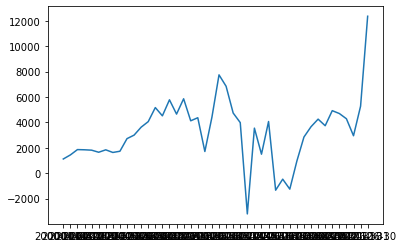

In [969]:
#plot for EBITDA
plt.plot(Dates,EBITDA['EBITDA'])
plt.show()

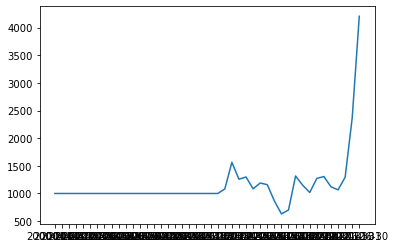

In [970]:
#plot for EBITDA
plt.plot(Dates,Feature['Shipping costs_Shipping costs'])
plt.show()

### Normalize

In [971]:
#get average and standard deviation 
EBITDA_avg , EBITDA_dev = EBITDA['EBITDA'].mean(), EBITDA['EBITDA'].std()
Feature_avg , Feature_dev = Feature['Shipping costs_Shipping costs'].mean(), Feature['Shipping costs_Shipping costs'].std()

In [972]:
EBITDA['EBITDA'] = (EBITDA['EBITDA'] - EBITDA_avg)/EBITDA['EBITDA']
Feature['Shipping costs_Shipping costs'] = (Feature['Shipping costs_Shipping costs'] - Feature_avg)/Feature['Shipping costs_Shipping costs']

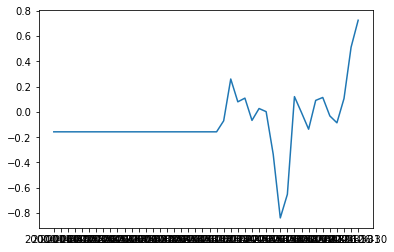

In [973]:
plt.plot(Dates,Feature['Shipping costs_Shipping costs'])
plt.show()

### Dealing with staionary issues

1. Take the first difference, fixes it around zero

In [974]:
EBITDA['EBITDA'] = EBITDA['EBITDA'].diff().dropna() #drops the value before the first vaule
#print(EBITDA)
Feature['Shipping costs_Shipping costs'] = Feature['Shipping costs_Shipping costs'].diff().dropna()
#print(Feature)

2. Dealing with the increasing volatlity problem

In [975]:
#take the standard deviation within each year
#divde each month by the standard deviation of its year
anual_volatility_EBITDA = EBITDA['EBITDA'].groupby(pd.DatetimeIndex(EBITDA['Date']).year).std().fillna(0)#
#print(anual_volatility_EBITDA)
anual_volatility_Feature = Feature['Shipping costs_Shipping costs'].groupby(pd.DatetimeIndex(Feature['Date']).year).std().fillna(0)
#print(anual_volatility_Feature)

In [976]:
#Forms a series thats the same length of the data but calucate the standard devation of the year for that data point
EBITDA_annual_vol = EBITDA['Date'].map(lambda d: anual_volatility_EBITDA.loc[pd.to_datetime(d).year], na_action='ignore')
#print(EBITDA_annual_vol)
Feature_annual_vol = Feature['Date'].map(lambda d: anual_volatility_Feature.loc[pd.to_datetime(d).year], na_action='ignore')
#print(EBITDA_annual_vol)

In [977]:
EBITDA['EBITDA'] = EBITDA['EBITDA'] /EBITDA_annual_vol
EBITDA['EBITDA'].replace([np.inf, -np.inf], np.nan, inplace=True)
EBITDA =EBITDA.fillna(method='ffill', limit=1)
#print(EBITDA)
Feature['Shipping costs_Shipping costs']= (Feature['Shipping costs_Shipping costs'] /Feature_annual_vol)
Feature['Shipping costs_Shipping costs'].replace([np.inf, -np.inf], np.nan, inplace=True)
Feature =Feature.fillna(method='ffill', limit=1)
#Feature['Shipping costs_Shipping costs']= Feature['Shipping costs_Shipping costs'].dropna()
#print(Feature)

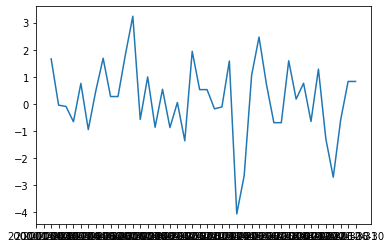

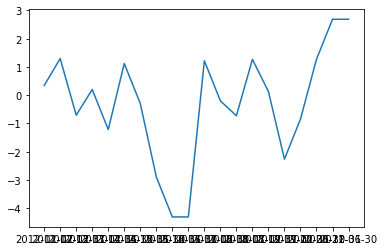

In [978]:
plt.plot(Dates,EBITDA['EBITDA'])
plt.show()
plt.plot(Dates,Feature['Shipping costs_Shipping costs'])
plt.show()

### Removing Seasonality

Here we get the average of the data point each year.Then we create a time series of the same lenght where the average. We then take the current series then subtract this average.

To change to fit our data we would use quarters instead of months. 

In [979]:
#mean of months 
#month_avgs1 = df1.groupby(df1.index.month).mean()
#month_avgs2 = df2.groupby(df2.index.month).mean()
month_avgs_EBITDA = EBITDA['EBITDA'].groupby(pd.DatetimeIndex(EBITDA['Date']).month).mean()
print(month_avgs_EBITDA)
month_avgs_Feature = Feature['Shipping costs_Shipping costs'].groupby(pd.DatetimeIndex(Feature['Date']).month).mean()
print(month_avgs_Feature)

Date
1     0.846747
6     0.628581
7    -0.832137
12   -0.070815
Name: EBITDA, dtype: float64
Date
1     0.276071
6    -0.385678
7     0.125481
12   -0.649482
Name: Shipping costs_Shipping costs, dtype: float64


In [980]:
#Create a time series as the same length as our data
EBITDA_month_avgs = EBITDA['Date'].map(lambda d: month_avgs_EBITDA.loc[pd.to_datetime(d).month])

Feature_month_avgs = Feature['Date'].map(lambda d: month_avgs_Feature.loc[pd.to_datetime(d).month])

In [981]:
#subtract monthly data from currect data
EBITDA['EBITDA'] = EBITDA['EBITDA'] - EBITDA_month_avgs
#print(EBITDA['EBITDA'])
Feature['Shipping costs_Shipping costs'] = Feature['Shipping costs_Shipping costs'] - Feature_month_avgs
#print(Feature['Shipping costs_Shipping costs'])

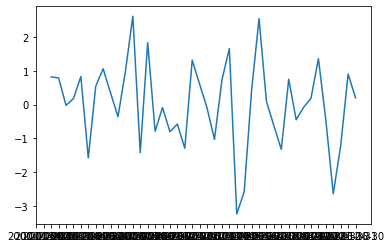

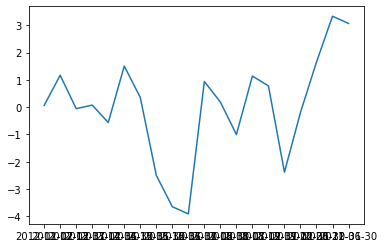

In [982]:
plt.plot(Dates,EBITDA['EBITDA'])
plt.show()
plt.plot(Dates,Feature['Shipping costs_Shipping costs'])
plt.show()

We can then do test such as the Dickey fuller test or a unit root test to see if true is truely staionary. <br> This is ow appropriate to feed into VARIMA Models

 ## VAR
 
 Before going straight to VARIMA I am going to implement VAR to gather an inital understanding.
 <br> First theres two components we need to think about the first is getting the lag for the time series we are trying to predict (EBITDA) and the other time series (Shipping, Geographical, Operational Cost ...) that are used in our prediction. 

In this example
<br> df1 -->time series we are trying to predict --> EBITDA
<br> df2 -->time series helping our prediction   --> Shipping Costs, Geogrphical, Operational Costs

In [983]:
#print(type(EBITDA['Date'][1]))

EBITDA['Date'] = pd.to_datetime(EBITDA['Date'])
Feature['Date'] = pd.to_datetime(Feature['Date'])

Company = EBITDA.set_index('Date')
Factors = Feature.set_index('Date') 

Cobined = Company
Cobined['Shipping costs_Shipping costs'] = Factors['Shipping costs_Shipping costs']
Cobined = Cobined.dropna()
Cobined

,EBITDA,Shipping costs_Shipping costs
Date,,
2012-01-02,-1.029642,0.064812
2012-07-02,0.719606,1.168007
2012-12-31,1.654080,-0.056293
2013-07-01,-3.230002,0.075297
2013-12-31,-2.577111,-0.563954
2014-06-30,0.424159,1.505004
2014-12-31,2.537768,0.354594
2015-06-30,0.091613,-2.499575
2015-12-31,-0.623205,-3.649985


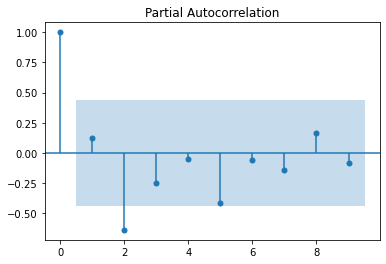

In [984]:
## PACF - partical AutoCorrelation 
num_lags=int(math.ceil(len(Cobined['EBITDA'])/2))-1 
print()
plot_pacf(Cobined['EBITDA'],lags = num_lags,method='ywm')
plt.show()

Getting the correlation between df1 and df2.

In [985]:
#shows all lags between 1-num lags and printing their corelation and p-value between the two
#lag in this example is the months
for lag in range(1,num_lags+1):
    EBITDA_lag = Cobined['EBITDA'].iloc[lag:]
    Feature_lag = Cobined['Shipping costs_Shipping costs'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(EBITDA_lag,Feature_lag))
    print('----------')

    
#Look for the smallest p value and the largest coreelation 
#1 lag = 1 time period
#order = correlation, p-value 

Lag: 1
(0.35318200814838274, 0.13800495927410367)
----------
Lag: 2
(-0.11784466206112298, 0.6414249108387274)
----------
Lag: 3
(-0.3144462990817493, 0.2189891249887365)
----------
Lag: 4
(0.02203502276771349, 0.935442419578443)
----------
Lag: 5
(0.008068585152644775, 0.9772325887027999)
----------
Lag: 6
(-0.2889898192797685, 0.3163032818566894)
----------
Lag: 7
(0.2321905954340129, 0.4452575511759181)
----------
Lag: 8
(0.6237210448904458, 0.03021268354452468)
----------
Lag: 9
(0.3955516656775494, 0.22853601632668222)
----------


Fitting VAR Model

In [986]:
#Get the relavant columns
#df = df[[df1_column, df2_column]]
#print(Cobined)

In [987]:
VAR_model =VAR(Cobined)

G:\Anaconda\envs\pythonProject1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [988]:
VAR_fit = VAR_model.fit(maxlags = 5) # we use 13 for BOTH time series, Change depending on the lag 

In [989]:
VAR_fit.summary()
#gives a table of results, we have not specified a heater. It treats them equally, there for we have two tabels below.
#Treats the two as the main series we want to predict
#Look down the prob coloum where is it small (<0.5), the lags in this category should tell us what lags are 
#important (We already knwo this)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 16, Apr, 2022
Time:                     16:29:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.27775
Nobs:                     15.0000    HQIC:                   1.22821
Log likelihood:          -29.8627    FPE:                    7.76435
AIC:                      1.23927    Det(Omega_mle):         2.58429
--------------------------------------------------------------------
Results for equation EBITDA
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                   -0.770492         0.399671           -1.928           0.054
L1.EBITDA                                0.185718         0.313544            0.592

So the <b>VAR model</b> is 

Gather the coeficients aboove associated with their lags.

i.e.
<br><b>1st_coef = coefient above that links to the first lag that its probability is below 0.5</b>
<br><b>1st_lag =  lets say 3 lag is the first lag with probability below 0.5, then we would get the data pinot from 3 periods ago</b>

<br>
<center><b>y_hat</b> = 1st_coef*1st_lag + 2nd_coef*2nd_lag + 3rd_coef*3rd_lag + ....</center>

Calculate the errors. Absolute difference and Mean squared error


## VARMA

Adding the moving average to the VAR model 

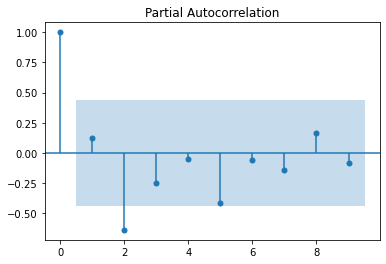

In [990]:
#PACF for the Autoregression p value
num_lags=int(math.ceil(len(Cobined['EBITDA'])/2))-1 
print()
plot_pacf(Cobined['EBITDA'],lags = num_lags,method='ywm')
plt.show()

Adding the moving average

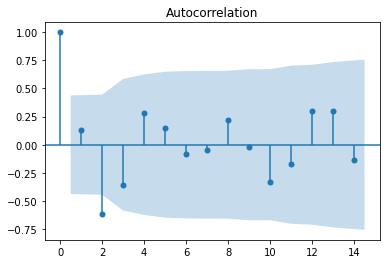

In [991]:
#ACF for the Moving Average q value
plot_acf(Cobined['EBITDA'])
plt.show()

In [992]:
#Get Coloums want to use 
#df_VARMA = ...

In [993]:
#Make model
#order=(AR p value, MA q value))
VARMA_model = VARMAX(Cobined, order=(2,2))

G:\Anaconda\envs\pythonProject1\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
G:\Anaconda\envs\pythonProject1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [994]:
#Fit Model
VARMA_fit = VARMA_model.fit(maxiter=1000, disp=False)
print(VARMA_fit.summary())

                                        Statespace Model Results                                       
Dep. Variable:     ['EBITDA', 'Shipping costs_Shipping costs']   No. Observations:                   20
Model:                                              VARMA(2,2)   Log Likelihood                 -50.451
                                                   + intercept   AIC                            142.903
Date:                                         Sat, 16 Apr 2022   BIC                            163.813
Time:                                                 16:29:31   HQIC                           146.985
Sample:                                                      0                                         
                                                          - 20                                         
Covariance Type:                                           opg                                         
Ljung-Box (L1) (Q):             2.45, 0.07   Jarque-Bera (JB):  

Predictiing beyound our sample

In [1015]:
#step = time steps beyound sample
Forecast = VARMA_fit.forecast(steps=100)
Forecast

G:\Anaconda\envs\pythonProject1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,EBITDA,Shipping costs_Shipping costs
20,-1.376360,0.235286
21,-1.352428,-0.433351
22,0.092778,-0.049409
23,-0.016958,-0.279265
24,-0.814598,-0.503615
...,...,...
115,-0.360171,0.091645
116,-0.360171,0.091645
117,-0.360171,0.091645
118,-0.360171,0.091645
